# Plag Ternary Diagram Segmented by Sample
- We consider a more real word example, using feldspar compositions
from Wieser et al. (2021b) from the 2018 eruption of Kilauea
- You can download the data here:
https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/General_Plotting/Plotting_inputs_Amp_Cpx_Ol_Fspar.xlsx

## Import Python things

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Thermobar as pt
import ternary

## Set plotting parameters

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Load in plagioclase compositions
- Even though some of these may be kspars, lets just load them all as plags for now. 

In [3]:
## Loading Plagioclases
Plag_dict=pt.import_excel('Plotting_inputs_Amp_Cpx_Ol_Fspar.xlsx', sheet_name='Plagioclase_F8')
Plag_Comps=Plag_dict['Plags']

## Lets calculate the components we need to plot a ternary diagram. 

In [4]:
tern_points=pt.tern_points_fspar(fspar_comps=Plag_Comps)

## First, we can plot all the samples as a single color
- We can see here, we have very distinct clusters

<AxesSubplot:>

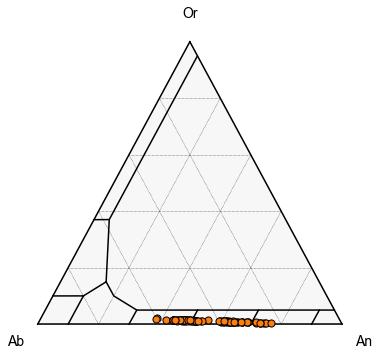

In [7]:

# make the figure with the classification lines as in the examples above.

fig, tax = pt.plot_fspar_classification(figsize=(6, 6), major_grid=True, ticks=False)


tax.scatter(
    tern_points, 
    edgecolor="k",
    marker="o",
    s=50
    
)


## Or, we can try to segment for different samples, First, lets find how many unique samples we have

In [8]:
Plag_Comps['Sample_ID_Plag'].unique()

array(['LL5', 'LL3', 'LL6', 'LL2', 'LL9', 'LL11', 'LL1', 'LL12', 'LL10'],
      dtype=object)

## Now lets segment out for each sample ID
- This might seem a bit confusing, because tern_points is a numpy array so has lost its sample ID. However, its the same length as Plag_Comps, so we can say find the rows of tern_points where the equivalent row of Plag_Comps has this sample ID
- Because we are indexing a numpy array, we dont need .loc, we just use brackets.
- note you could do this in a foorloop, but this example just walks through all steps, and lets you control colors etc. more easily.

In [9]:
Plag_Comps_LL5=tern_points[Plag_Comps['Sample_ID_Plag']=="LL5"]
Plag_Comps_LL3=tern_points[Plag_Comps['Sample_ID_Plag']=="LL3"]
Plag_Comps_LL1=tern_points[Plag_Comps['Sample_ID_Plag']=="LL1"]
Plag_Comps_LL9=tern_points[Plag_Comps['Sample_ID_Plag']=="LL9"]
Plag_Comps_LL11=tern_points[Plag_Comps['Sample_ID_Plag']=="LL11"]
Plag_Comps_LL12=tern_points[Plag_Comps['Sample_ID_Plag']=="LL12"]
Plag_Comps_LL10=tern_points[Plag_Comps['Sample_ID_Plag']=="LL8"]
Plag_Comps_LL6=tern_points[Plag_Comps['Sample_ID_Plag']=="LL6"]
Plag_Comps_LL2=tern_points[Plag_Comps['Sample_ID_Plag']=="LL2"]


## Plot 1
- Lets just plot the feldspars from sample LL2, which was dacitic in composition vs. basaltic-andesitic material in the other sampels

<AxesSubplot:>

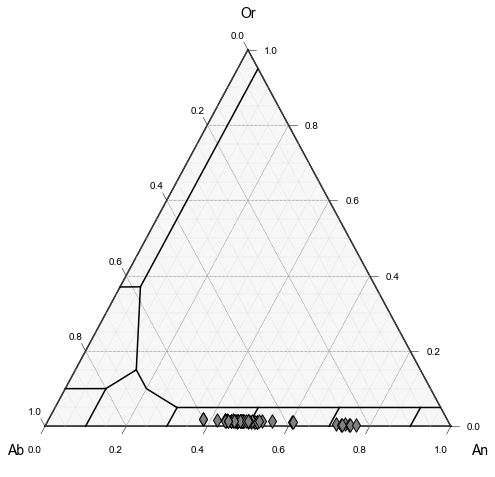

In [10]:
# First, define the plot, e.g., here, we specify we want the grid, and labels
fig, tax = pt.plot_fspar_classification(figsize=(8, 8),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Now feed in your data we calculated at the start in terms of ternary axes!

tax.scatter(
   Plag_Comps_LL2,
    edgecolor="k",
    marker="d",
    facecolor="grey",
    label='Label1',
   s=90
)
    

## Plot 2
- Lets add LL10, LL9, LL12, LL11, LL6, and LL3 which were all erupted at similar times (Termed Early Phase 1) as a single symbol type. To do this, first we combine these different numpy arrays (called Early Samples)
- We also want to add LL5, erupted on May 16th as a different color, along with LL1. 
- This shows that regardless of the fissure, feldspar compositions are very similar, consistent with derivation from a single magma body

In [11]:
Early_Samples=np.concatenate((Plag_Comps_LL10, Plag_Comps_LL9, Plag_Comps_LL12, Plag_Comps_LL11, Plag_Comps_LL6, Plag_Comps_LL3), axis=0)

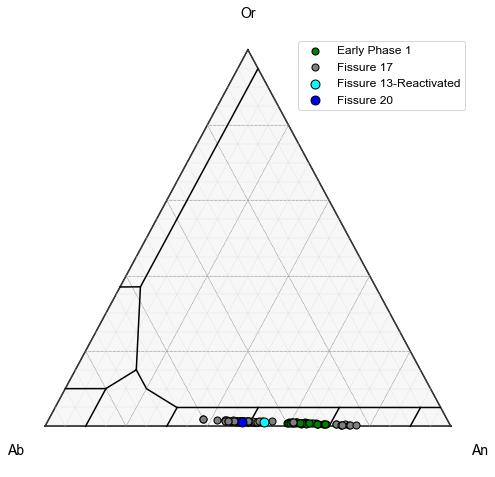

In [12]:
# First, define the plot, e.g., here, we specify we want the grid, and labels
fig, tax = pt.plot_fspar_classification(figsize=(8, 8),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True, ticks=False)

## Adding the dacitic sample as grey diamonds


    

    
tax.scatter(
   Early_Samples,
    edgecolor="k",
    marker="o",
    facecolor="green",
    label='Early Phase 1',
   s=50
)





tax.scatter(
   Plag_Comps_LL2,
    edgecolor="k",
    marker="o",
    facecolor="grey",
    label='Fissure 17',
   s=50
)


tax.scatter(
   Plag_Comps_LL1,
    edgecolor="k",
    marker="o",
    facecolor="cyan",
    label='Fissure 13-Reactivated',
   s=80
)

tax.scatter(
   Plag_Comps_LL5,
    edgecolor="k",
    marker="o",
    facecolor="blue",
    label='Fissure 20',
   s=80
)


tax.legend()